***Probability and Math Section***
1. Answer: C) p = 1/2

    Taking P(i) and Q(i) as probabilities of getting a head and a tail for the i'th coin as P(i) = i/i+1 and Q(i) = 1 - P(i), we solve the problem using a generating function.

          f(x) = ∏ (Q(i)+P(i)x) for i=1 to n=10;
    In this polynomial, the coefficient of x^k represents the probability of getting exactly k heads.
    The sum of probabilities of getting an even number of heads is the sum of the coefficients of the even powers of x. This can be calculated as (f(1)+f(−1))/2

    The sum of probabilities of getting an odd number of heads (p) is the sum of the coefficients of the odd powers of x. This can be calculated as p=(f(1)−f(−1))/2

    From calculations: f(1) = 1, as sum of all probabilities = 1.
    f(-1) = ∏(Q(i)-P(i)) = ∏(i-1/i+1)
  
    Upon expanding f(-1), we get its value = (0/2)*(1/3)*.... = 0
    Hence, p = (f(1)-f(-1))/2 = 1-0/2 = 1/2
2. Answer: B) **0.73**

    This problem is a type of "Random Walk". Now, taking thr values given in quesiton,
      
            S0 (Initial Stock Price) = 10
            H (Target High Price) = 15
            L (Target Low Price) = 5
            p (Prob. of price increase) = 0.55
            q (Prob. of price decrease) = 1-p = 1-0.55 = 0.45

    Using the formula for the probability of reaching the high target H before the low target L in a biased random walk, we get:

            P (H before L) = ((1 - (q/p))^(S0-L))/((1 - (q/p))^(H-L))
    Substituting the values, we get: P = 0.7314 = 0.73 (approx)

3. Answer: C) **0.48**

    This is a Binomial Distribution based problem, hence a normal distribution works fine as the sample is enormous.
    Sample size: n = 500; Prob. of success (Wearing a seatbelt): p = 0.8;
    Number of successes: X>400;
    From the data,

    Mean = np = 400;
    Standard Deviation = (np(1-p))^(0.5) = (80)^(0.5) = 8.944 (Approx)
  
    Note that P(X>400) should be taken as P(X>400.5). Hence, Z-score is:

                Z = (X-Mean)/(Standard Deviation) = 0.056 (Approx)
    Now, we need P(Z>0.056) = 1 - P(Z<=0.056) = 1 - 0.5223 = 0.4777 ~= 0.48

4. Answer: **32 Turns**

    Taking E(k) = expected number of additional turns required to get the "all off" state, given k bulbs are currently turned on.
  
        E(k) =
        1 + (Prob. of turning a bulb off).E(k-1) + (Prob. of turning a bulb on).E(k+1)

        E(k) = 1 + (k/5)*E(k-1) + (5-k/5)*E(k+1)

    For different k values (1 to 5), we get 5 different equations.
    Note that E(0) = 0.

    Substituting the equations into each other from one known variable, we can find E(1).
    (E(5) in terms of E(4), then E(4) in terms of E(3), and so on)

    Expected TIme = 1 + E(1) = 1 + 31 = 32 turns.

5. Answer: **1/20**

    Probability of the first distinct number rolled being odd or even is 3/6 = 1/2.
    Let the outcome be ODD, then:
    
    The 5 remaining numbers have 2 more odds left in them. Probability of the second distinct number rolled being odd = 2/5.

    In the similar way, probability of the third distinct number rolled being odd = 1/4.

    Multiplying these properties, we get:
    P(All odds before even) = (3/6)*(2/5)*(1/4) = (1/20)

    Other methods include permutations, where we have 3! ways of getting a distinct odd and 3! ways of getting a distinct even later on. Since the total number of such ways are 6!, the probability is: (3!)*(3!)/(6!) = 1/20

[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  1 of 1 completed




RELIANCE:

Average Daily Return: -0.019238422645319452
Standard Deviation of the Daily Return: 1.3312422142456288
Sharpe-Ratio of the Stock: -0.22895453033422924
Below optimal risk

TCS:

Average Daily Return: -0.12143749242628328
Standard Deviation of the Daily Return: 1.292348494141721
Sharpe-Ratio of the Stock: -1.488709673836735
Below optimal risk

INFY:

Average Daily Return: -0.0726664083685392
Standard Deviation of the Daily Return: 1.6098657753728454
Sharpe-Ratio of the Stock: -0.7151232338888293
Below optimal risk

HINDUNILVR:

Average Daily Return: -0.04365478469834567
Standard Deviation of the Daily Return: 1.2310400263171994
Sharpe-Ratio of the Stock: -0.5618191488841809
Below optimal risk

MARUTI:

Average Daily Return: 0.11151612805896259
Standard Deviation of the Daily Return: 1.4115283252674558
Sharpe-Ratio of the Stock: 1.251655883280068
Optimal risk

ITC:

Average Daily Return: -0.08028378253315434
Standard Deviation of the Daily Return: 1.1274105657130165
Sharpe-Ra

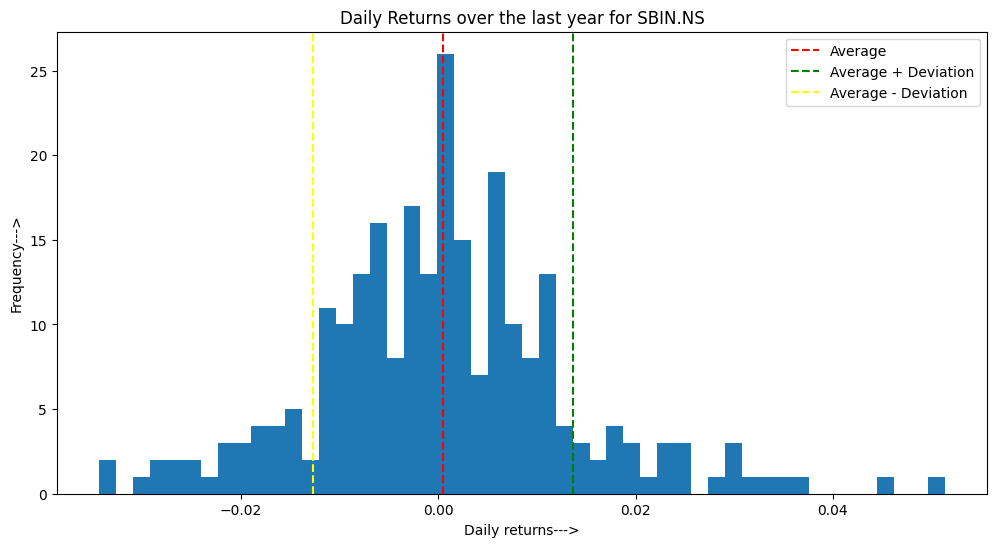

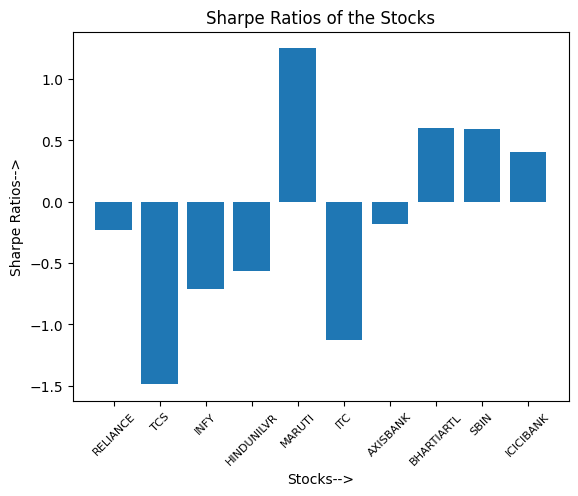



On a risk adjusted basis, MARUTI performed the best, with a sharpe-ratio of 1.251655883280068


In [4]:
# Coding Section #
######## TASK 1 #########
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

# Selecting 10 stocks
stocks = ["RELIANCE","TCS","INFY","HINDUNILVR","MARUTI","ITC","AXISBANK","BHARTIARTL","SBIN","ICICIBANK"]
tickers = [f"{stock}.NS" for stock in stocks]



data = yf.download(tickers,period="1y",interval="1d",auto_adjust=True)

print("\n")
for stock in stocks:
  foryf = f"{stock}.NS"
  dailyret = data['Close'][foryf].pct_change()

  avg_dailyret = dailyret.mean()*100
  stdev_dailyret = dailyret.std()*100
  sharpe_ratio = (avg_dailyret / stdev_dailyret)*np.sqrt(251)

  print(f"{stock}:")
  # for val in dailyret.values:
  #   print(f"{val+1}, ",end="")                    # For all the daily returns
  print("\nAverage Daily Return:",avg_dailyret)
  print("Standard Deviation of the Daily Return:",stdev_dailyret)
  print("Sharpe-Ratio of the Stock:",sharpe_ratio)

  if sharpe_ratio<1:
    print("Below optimal risk\n")
  elif sharpe_ratio<2:
    print("Optimal risk\n")
  else:
    print("High risk - High reward\n")

# Pick a random stock for graphing its daily returns - HISTOGRAM
random_stock = f"{rnd.choice(stocks)}.NS"
rand_stock_data = yf.download(random_stock,period="1y",interval="1d",auto_adjust=True)
dailyretran = rand_stock_data['Close'].pct_change()
avg_dailyretran = dailyretran.mean()
stddev_dailyretran = dailyretran.std()
print("RED LINE - Average Daily Return")
print("GREEN LINE - Average Daily Returns + Standard Deviation")
print("YELLOW LINE - Average Daily Returns - Standard Deviation")
# Plotting part - HISTOGRAM
plt.figure(figsize=(12,6))
plt.hist(dailyretran.dropna(), bins=50)
# Marking the average
plt.axvline(x=avg_dailyretran.item(),color="red",linestyle="--",label="Average") # "item()" brecause then it becomes a native float
# Marking the min and max deviations from average
plt.axvline(x=(avg_dailyretran.item()+stddev_dailyretran.item()),color="green",linestyle="--",label="Average + Deviation")
plt.axvline(x=(avg_dailyretran.item()-stddev_dailyretran.item()),color="yellow",linestyle="--",label="Average - Deviation")
plt.legend()
plt.title(f"Daily Returns over the last year for {random_stock}")
plt.xlabel("Daily returns--->")
plt.ylabel("Frequency--->")
plt.show()
print("\n")
# Sharpe Values of all the stocks - BAR GRAPH
sharpe_ratios = {}
max=0
for stock in stocks:
  foryf = f"{stock}.NS"
  dailyret = data['Close'][foryf].pct_change()
  avg_dailyret = dailyret.mean()*100
  stdev_dailyret = dailyret.std()*100
  sharpe_ratio = (avg_dailyret / stdev_dailyret)*np.sqrt(251)
  sharpe_ratios[stock] = sharpe_ratio
  if sharpe_ratio>max:
    max = sharpe_ratio
    ans = stock
plt.bar(sharpe_ratios.keys(),sharpe_ratios.values())
plt.xticks(rotation=45,fontsize=8)
plt.title("Sharpe Ratios of the Stocks")
plt.xlabel("Stocks-->")
plt.ylabel("Sharpe Ratios-->")
plt.show()
print('\n')
print(f"On a risk adjusted basis, {ans} performed the best, with a sharpe-ratio of {max}")

[*********************100%***********************]  1 of 1 completed


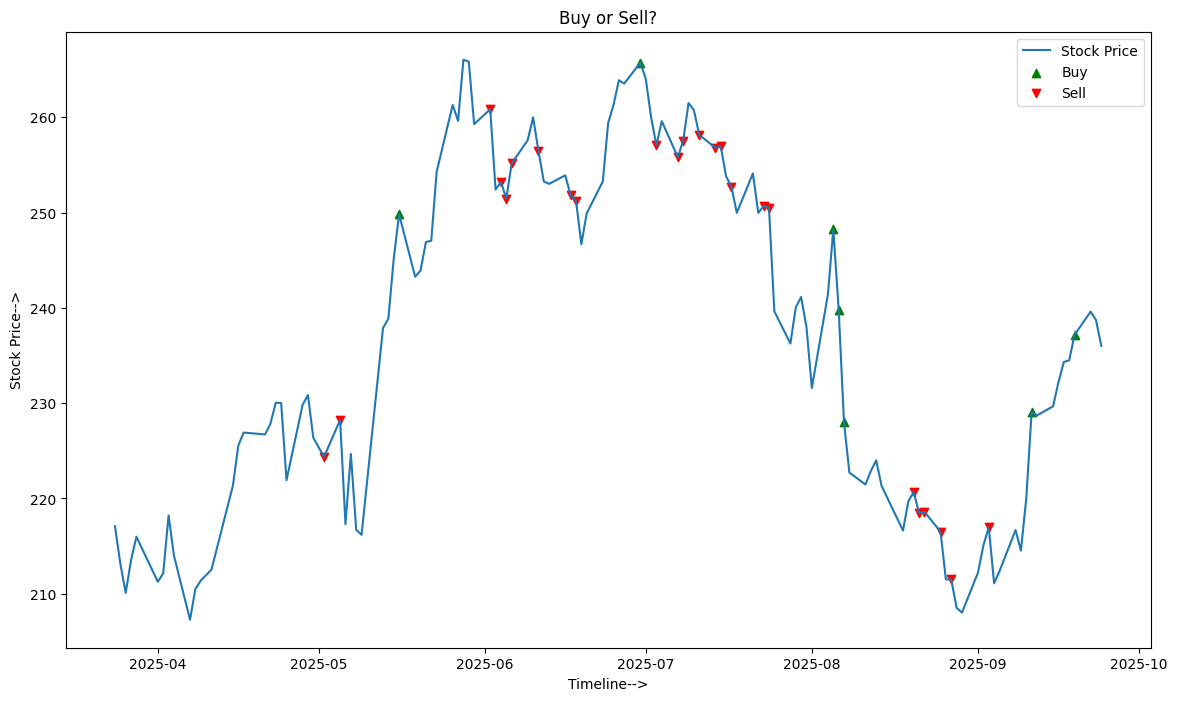

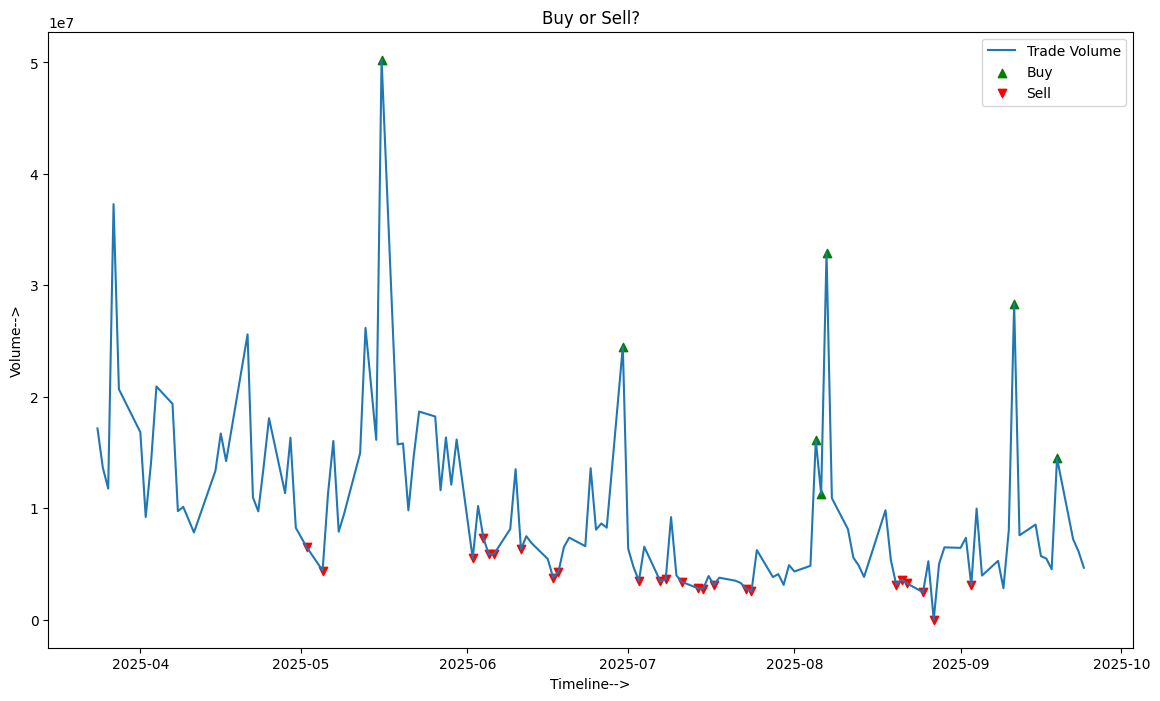

In [2]:
######## TASK 2 #########
import csv
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
stock_name = "Bharat Heavy Electricals Limited"
stock = "BHEL.NS"
data = yf.download(stock,period="6mo",interval="1d",auto_adjust=True)
data["20davg"] = data["Volume"].rolling(window=20).mean()
data["Buy_Marking"] = (data["Volume"][stock] > (2.0)*data["20davg"]).astype(int)
data["Sell_Marking"] = (data["Volume"][stock] < (0.5)*data["20davg"]).astype(int)

## Graph w.r.t Stock Price #
plt.figure(figsize=(14,8)) # Dimensions of the graph
plt.plot(data.index, data["Close"],"-",label="Stock Price")
plt.title("Buy or Sell?")
plt.xlabel("Timeline-->")
plt.ylabel("Stock Price-->")
# Scatter graph on top of the previous graph to show whether to buy or sell with colour key
plt.scatter(data.index[data["Buy_Marking"]==1],data["Close"][data["Buy_Marking"]==1],marker="^",color="green",label="Buy")
plt.scatter(data.index[data["Sell_Marking"]==1],data["Close"][data["Sell_Marking"]==1],marker="v",color="red",label="Sell")
plt.legend()
plt.show()
print('\n')

# Graph w.r.t Trade Volume #
plt.figure(figsize=(14,8)) # Dimensions of the graph
plt.plot(data.index, data["Volume"],"-",label="Trade Volume")
plt.title("Buy or Sell?")
plt.xlabel("Timeline-->")
plt.ylabel("Volume-->")
# Scatter graph on top of the previous graph to show whether to buy or sell with colour key
plt.scatter(data.index[data["Buy_Marking"]==1],data["Volume"][data["Buy_Marking"]==1],marker="^",color="green",label="Buy")
plt.scatter(data.index[data["Sell_Marking"]==1],data["Volume"][data["Sell_Marking"]==1],marker="v",color="red",label="Sell")
plt.legend()
plt.show()

# Adding to CSV File
buy_list = pd.DataFrame({"Dates":data.index[data["Buy_Marking"]==1],"Indication":"Buy"}) # All the dates for buy-list only
sell_list = pd.DataFrame({"Dates":data.index[data["Sell_Marking"]==1],"Indication":"Sell"}) # For sell dates
dates = pd.concat([buy_list,sell_list]) # Lists joined together
dates.to_csv("dates.csv")